In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fifteen_days_df = pd.read_excel("data_6.1~6.15.xlsx")

In [3]:
fifteen_days_df.shape

(611506, 7)

In [4]:
fifteen_days_df['user id'].nunique()

6608

In [5]:
fifteen_days_df.head()

,month,date,start time,end time,latitude,longitude,user id
0,201406,1,2014-06-01 10:22:36,2014-06-01 11:09:52,31.237872,121.470259,edbc54bddf16494a49f39ac057b4185d
1,201406,1,2014-06-01 07:00:37,2014-06-01 08:49:20,31.237872,121.470259,f8206ab58b9bdb070673f7050242e9ee
2,201406,1,2014-06-01 02:49:16,2014-06-01 05:49:12,31.237872,121.470259,f8206ab58b9bdb070673f7050242e9ee
3,201406,1,2014-06-01 08:51:58,2014-06-01 09:20:50,31.237872,121.470259,f8206ab58b9bdb070673f7050242e9ee
4,201406,1,2014-05-31 23:49:10,2014-06-01 02:49:07,31.237872,121.470259,f8206ab58b9bdb070673f7050242e9ee


In [6]:
fifteen_days_df[fifteen_days_df.isnull().any(axis=1)]

,month,date,start time,end time,latitude,longitude,user id
351,201406,1,2014-06-01 11:47:21,2014-06-01 14:47:20,NaN,NaN,9e719b94cb914f4607cc00ec919bc0de
352,201406,1,2014-06-01 21:38:57,2014-06-01 22:34:28,NaN,NaN,5cd97227432e2a96621dc041ffd37a8e
353,201406,1,2014-06-01 21:13:54,2014-06-01 22:58:39,NaN,NaN,5cd97227432e2a96621dc041ffd37a8e
354,201406,1,2014-05-31 23:53:55,2014-05-31 23:58:11,NaN,NaN,5cd97227432e2a96621dc041ffd37a8e
355,201406,1,2014-06-01 01:10:06,2014-06-01 01:58:32,NaN,NaN,5cd97227432e2a96621dc041ffd37a8e
...,...,...,...,...,...,...,...
611501,201406,15,2014-06-15 06:28:05,2014-06-15 06:28:23,NaN,NaN,c9bb8d82dac3acd0035bb214503ad3dc
611502,201406,15,2014-06-15 23:00:03,2014-06-15 23:10:02,NaN,NaN,c9bb8d82dac3acd0035bb214503ad3dc
611503,201406,15,2014-06-15 14:10:36,2014-06-15 17:06:36,NaN,NaN,f3533f216dfc72a23bba26c4e3f0247c
611504,201406,15,2014-06-15 14:10:35,2014-06-15 17:10:31,NaN,NaN,f3533f216dfc72a23bba26c4e3f0247c


In [7]:
fifteen_days_df.dropna(inplace=True)

In [8]:
fifteen_days_df.shape

(563914, 7)

In [9]:
fifteen_days_df['user id'].nunique()

6262

In [10]:
# Create a new column 'base_station' based on unique latitude and longitude combinations
fifteen_days_df['base_station'] = fifteen_days_df.groupby(['latitude', 'longitude']).ngroup() + 1

# unique number of base stations
fifteen_days_df['base_station'].nunique()

2769

In [11]:
# Convert 'record_start_date' to datetime format
fifteen_days_df['start_time'] = pd.to_datetime(fifteen_days_df['start time'])

# Sort the DataFrame by 'userid' and 'record_start_date'
fifteen_days_df = fifteen_days_df.sort_values(by=['user id', 'start_time'])

# Calculate the inter-arrival time for each user to each base station
fifteen_days_df['inter_arrival_time'] = fifteen_days_df.groupby(['user id', 'base_station'])['start_time'].diff().dt.total_seconds()

In [12]:
# Group by 'record_start_date' and find the base station with the maximum number of requests and their counts
max_requests_per_date = fifteen_days_df.groupby(['date', 'base_station']).size().reset_index(name='requests_count')

# Find the row with the maximum request count for each date
idx = max_requests_per_date.groupby('date')['requests_count'].idxmax()
max_requests_per_date = max_requests_per_date.loc[idx]

# Displaying the result
print(max_requests_per_date)

       date  base_station  requests_count
1848      1          2759             171
3664      2          2654             252
4322      3           720             170
7400      4          2198             152
8743      5          1092             179
10826     6          1092             159
13547     7          2198             183
15478     8          2209             185
16494     9           727             180
18367    10           495             178
20452    11           495             155
22837    12           851             729
24900    13           851             784
26971    14           851             514
28927    15           851             473


### hourly data for cloud (all BS)

In [13]:
# Create 1-hour intervals using the cut function
fifteen_days_df['hourly_interval'] = pd.cut(fifteen_days_df['start_time'], 
                                            bins=pd.date_range(start=fifteen_days_df['start_time'].min(), 
                                                               end=fifteen_days_df['start_time'].max(), freq='1H'))

# Group by 'userid', 'base_station', and 'hourly_interval' and count the number of requests
total_hourly_requests = fifteen_days_df.groupby(['hourly_interval']).size().reset_index(name='total_requests')

total_hourly_requests['hours'] = range(1, len(total_hourly_requests) + 1)

total_hourly_requests

C:\Users\summitsh\AppData\Local\Temp\1\ipykernel_18816\1735299810.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_hourly_requests = fifteen_days_df.groupby(['hourly_interval']).size().reset_index(name='total_requests')


,hourly_interval,total_requests,hours
0,"(2014-05-31 23:00:00, 2014-06-01]",994,1
1,"(2014-06-01, 2014-06-01 01:00:00]",842,2
2,"(2014-06-01 01:00:00, 2014-06-01 02:00:00]",645,3
3,"(2014-06-01 02:00:00, 2014-06-01 03:00:00]",541,4
4,"(2014-06-01 03:00:00, 2014-06-01 04:00:00]",574,5
...,...,...,...
355,"(2014-06-15 18:00:00, 2014-06-15 19:00:00]",1812,356
356,"(2014-06-15 19:00:00, 2014-06-15 20:00:00]",1760,357
357,"(2014-06-15 20:00:00, 2014-06-15 21:00:00]",1657,358
358,"(2014-06-15 21:00:00, 2014-06-15 22:00:00]",1650,359


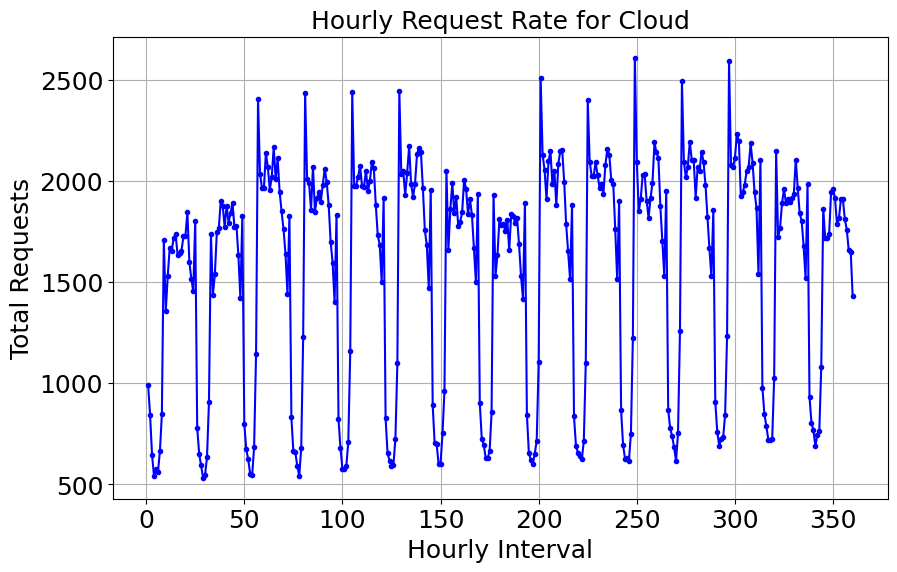

In [14]:
# Plotting a line plot
plt.rcParams['font.size'] = 18
plt.figure(figsize=(10, 6))
plt.plot(total_hourly_requests['hours'], total_hourly_requests['total_requests'], marker='.', linestyle='-', color='b')
plt.title('Hourly Request Rate for Cloud', fontsize=18)
plt.xlabel('Hourly Interval', fontsize=18)
plt.ylabel('Total Requests', fontsize=18)
plt.grid(True)
plt.savefig("finalized_analysis_data/cloud_requests.png")
plt.show()

In [15]:
total_hourly_requests['total_requests'].describe(percentiles=[.25, .50, .75, .85, .95, .99, .999])

count     360.000000
mean     1564.050000
std       561.651953
min       533.000000
25%       907.500000
50%      1796.500000
75%      1983.250000
85%      2066.450000
95%      2152.350000
99%      2464.090000
99.9%    2603.897000
max      2610.000000
Name: total_requests, dtype: float64

In [16]:
cloud_stats = total_hourly_requests['total_requests'].describe(percentiles=[.25, .50, .75, .85, .95, .99, .999]).to_frame().transpose()

In [17]:
cloud_stats['mean/max'] = cloud_stats['mean'] / cloud_stats['max']

In [18]:
cloud_stats

,count,mean,std,min,25%,50%,75%,85%,95%,99%,99.9%,max,mean/max
total_requests,360.0,1564.05,561.651953,533.0,907.5,1796.5,1983.25,2066.45,2152.35,2464.09,2603.897,2610.0,0.599253


In [19]:
del cloud_stats['count']

In [20]:
cloud_stats

,mean,std,min,25%,50%,75%,85%,95%,99%,99.9%,max,mean/max
total_requests,1564.05,561.651953,533.0,907.5,1796.5,1983.25,2066.45,2152.35,2464.09,2603.897,2610.0,0.599253


In [21]:
total_hourly_requests['total_requests'].mean()/ total_hourly_requests['total_requests'].max()

0.5992528735632183

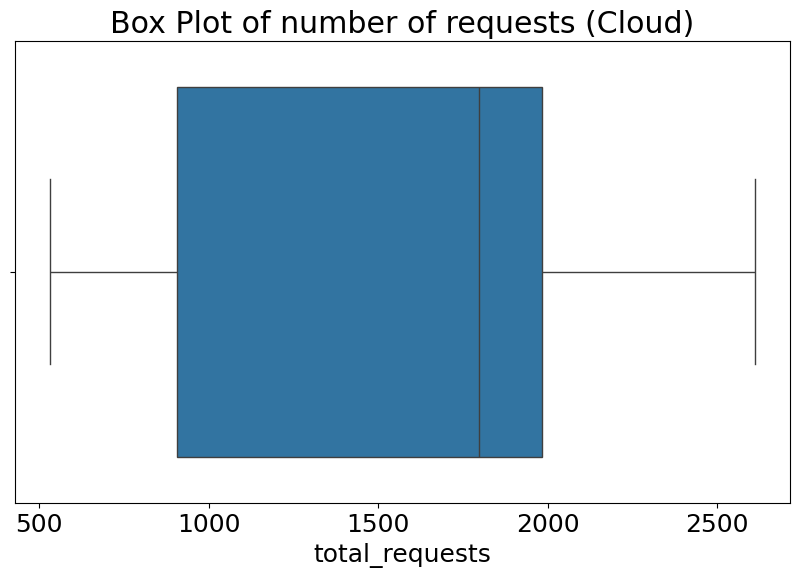

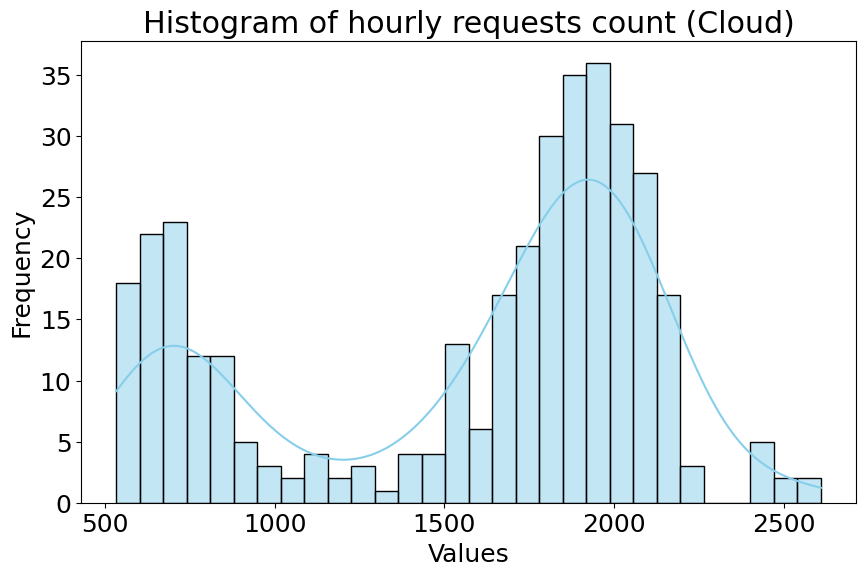

In [22]:
import seaborn as sns

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=total_hourly_requests['total_requests'])
plt.title('Box Plot of number of requests (Cloud)')
plt.show()

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(total_hourly_requests['total_requests'], kde=True, bins=30, color='skyblue')
plt.title('Histogram of hourly requests count (Cloud)')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

### Hourly data for Edge (BS 851)

In [23]:
# Create 1-hour intervals using the cut function
fifteen_days_df['hourly_interval'] = pd.cut(fifteen_days_df['start_time'], 
                                            bins=pd.date_range(start=fifteen_days_df['start_time'].min(), 
                                                           end=fifteen_days_df['start_time'].max(), freq='1H'))

# Group by 'userid', 'base_station', and 'hourly_interval' and count the number of requests
hourly_requests_per_bs = fifteen_days_df.groupby(
    ['base_station', 'hourly_interval']).size().reset_index(name='total_requests')

hourly_requests_per_bs

C:\Users\summitsh\AppData\Local\Temp\1\ipykernel_18816\2349421322.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_requests_per_bs = fifteen_days_df.groupby(


,base_station,hourly_interval,total_requests
0,1,"(2014-05-31 23:00:00, 2014-06-01]",1
1,1,"(2014-06-01, 2014-06-01 01:00:00]",1
2,1,"(2014-06-01 01:00:00, 2014-06-01 02:00:00]",0
3,1,"(2014-06-01 02:00:00, 2014-06-01 03:00:00]",1
4,1,"(2014-06-01 03:00:00, 2014-06-01 04:00:00]",0
...,...,...,...
996835,2769,"(2014-06-15 18:00:00, 2014-06-15 19:00:00]",0
996836,2769,"(2014-06-15 19:00:00, 2014-06-15 20:00:00]",0
996837,2769,"(2014-06-15 20:00:00, 2014-06-15 21:00:00]",0
996838,2769,"(2014-06-15 21:00:00, 2014-06-15 22:00:00]",0


In [24]:
hourly_requests_for_edge = hourly_requests_per_bs[hourly_requests_per_bs['base_station'] == 851]

hourly_requests_for_edge['hours'] = range(1, len(hourly_requests_for_edge) + 1)

hourly_requests_for_edge

C:\Users\summitsh\AppData\Local\Temp\1\ipykernel_18816\441459659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourly_requests_for_edge['hours'] = range(1, len(hourly_requests_for_edge) + 1)


,base_station,hourly_interval,total_requests,hours
306000,851,"(2014-05-31 23:00:00, 2014-06-01]",1,1
306001,851,"(2014-06-01, 2014-06-01 01:00:00]",1,2
306002,851,"(2014-06-01 01:00:00, 2014-06-01 02:00:00]",0,3
306003,851,"(2014-06-01 02:00:00, 2014-06-01 03:00:00]",0,4
306004,851,"(2014-06-01 03:00:00, 2014-06-01 04:00:00]",1,5
...,...,...,...,...
306355,851,"(2014-06-15 18:00:00, 2014-06-15 19:00:00]",21,356
306356,851,"(2014-06-15 19:00:00, 2014-06-15 20:00:00]",3,357
306357,851,"(2014-06-15 20:00:00, 2014-06-15 21:00:00]",25,358
306358,851,"(2014-06-15 21:00:00, 2014-06-15 22:00:00]",40,359


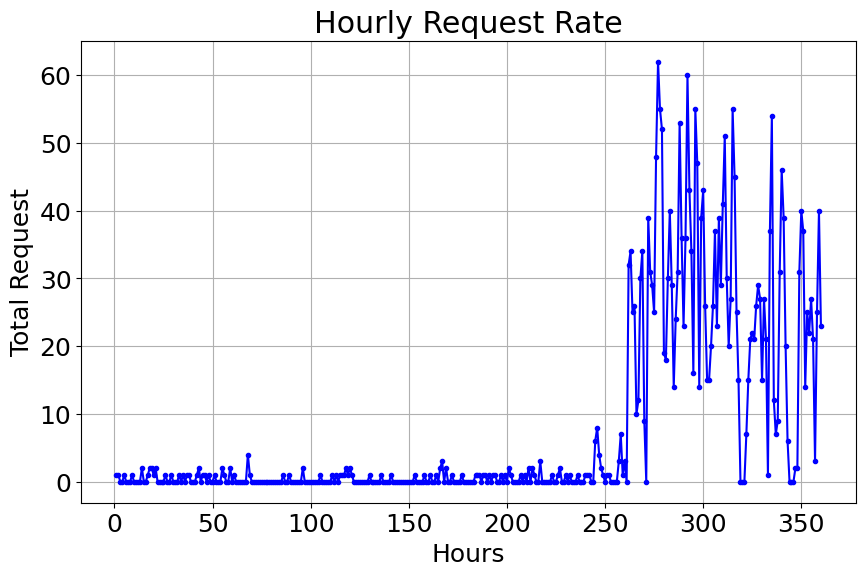

In [25]:
# Plotting a line plot
plt.figure(figsize=(10, 6))
plt.plot(hourly_requests_for_edge['hours'], hourly_requests_for_edge['total_requests'], marker='.', linestyle='-', color='b')
plt.title('Hourly Request Rate')
plt.xlabel('Hours')
plt.ylabel('Total Request')
plt.grid(True)
plt.show()

In [26]:
hourly_requests_for_edge['total_requests'].describe(percentiles=[.25, .50, .75, .85, .95, .99, .999])

count    360.000000
mean       7.613889
std       14.087009
min        0.000000
25%        0.000000
50%        1.000000
75%        6.000000
85%       25.000000
95%       40.000000
99%       55.000000
99.9%     61.282000
max       62.000000
Name: total_requests, dtype: float64

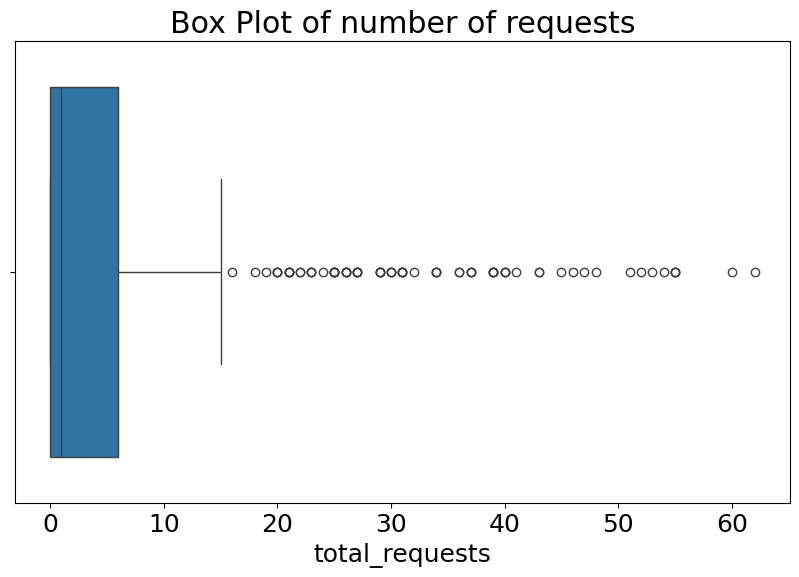

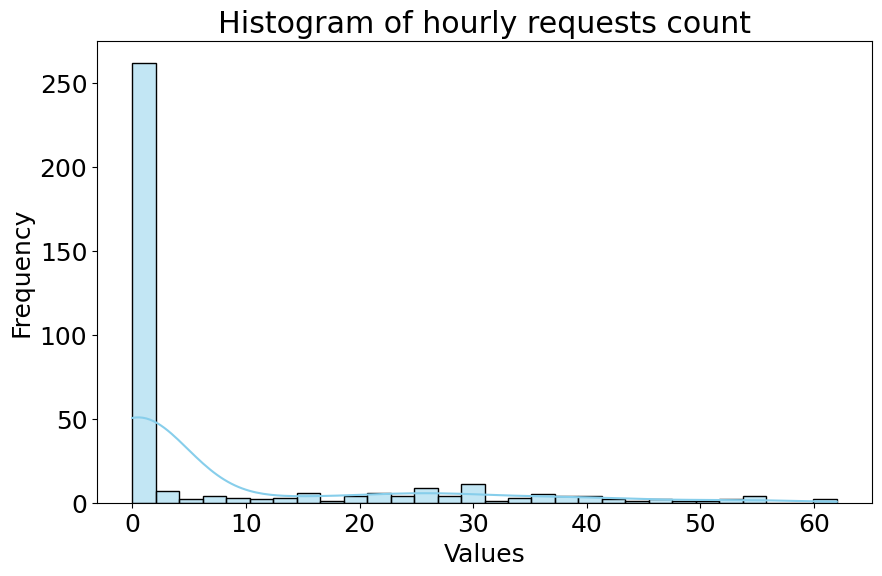

In [27]:
import seaborn as sns

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=hourly_requests_for_edge['total_requests'])
plt.title('Box Plot of number of requests')
plt.show()

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(hourly_requests_for_edge['total_requests'], kde=True, bins=30, color='skyblue')
plt.title('Histogram of hourly requests count')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [28]:
hourly_requests_for_edge['total_requests'].mean()/ hourly_requests_for_edge['total_requests'].max()

0.12280465949820789

### Hourly avg data for Edge

In [56]:
# Create 1-hour intervals using the cut function
fifteen_days_df['hourly_interval'] = pd.cut(fifteen_days_df['start_time'], 
                                        bins=pd.date_range(start=fifteen_days_df['start_time'].min(), 
                                                           end=fifteen_days_df['start_time'].max(), freq='1H'))

# Group by 'userid', 'base_station', and 'hourly_interval' and count the number of requests
hourly_requests_per_bs = fifteen_days_df.groupby(
    ['base_station', 'hourly_interval']).size().reset_index(name='total_requests')

hourly_requests_per_bs

C:\Users\summitsh\AppData\Local\Temp\1\ipykernel_1956\2676204250.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_requests_per_bs = fifteen_days_df.groupby(


,base_station,hourly_interval,total_requests
0,1,"(2014-05-31 23:00:00, 2014-06-01]",1
1,1,"(2014-06-01, 2014-06-01 01:00:00]",1
2,1,"(2014-06-01 01:00:00, 2014-06-01 02:00:00]",0
3,1,"(2014-06-01 02:00:00, 2014-06-01 03:00:00]",1
4,1,"(2014-06-01 03:00:00, 2014-06-01 04:00:00]",0
...,...,...,...
996835,2769,"(2014-06-15 18:00:00, 2014-06-15 19:00:00]",0
996836,2769,"(2014-06-15 19:00:00, 2014-06-15 20:00:00]",0
996837,2769,"(2014-06-15 20:00:00, 2014-06-15 21:00:00]",0
996838,2769,"(2014-06-15 21:00:00, 2014-06-15 22:00:00]",0


In [57]:
# Group by base_station and calculate various summary statistics
edge_summary_stats = hourly_requests_per_bs.groupby('base_station')['total_requests'].describe(percentiles=[.25, .50, .75, .85, .95, .99, .999])

# Extract relevant columns
edge_summary_dataframe = edge_summary_stats[['max', 'mean', 'std', 'min', '25%', '50%', '75%', '85%', '95%', '99%', '99.9%']].reset_index()

# Rename columns for clarity
edge_summary_dataframe.columns = ['base_station', 'max', 'mean', 'std', 'min','25%', '50%', '75%', '85%', '95%', '99%', '99.9%']

In [58]:
edge_summary_stats

,count,mean,std,min,25%,50%,75%,85%,95%,99%,99.9%,max
base_station,,,,,,,,,,,,
1,360.0,0.983333,1.096843,0.0,0.0,1.0,2.0,2.0,3.00,4.41,5.641,6.0
2,360.0,0.405556,0.842448,0.0,0.0,0.0,0.0,1.0,2.00,3.41,4.641,5.0
3,360.0,0.077778,0.324583,0.0,0.0,0.0,0.0,0.0,1.00,1.41,2.641,3.0
4,360.0,3.447222,3.019434,0.0,1.0,3.0,5.0,6.0,8.00,13.82,17.282,18.0
5,360.0,0.863889,1.710471,0.0,0.0,0.0,1.0,2.0,5.00,8.00,10.282,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2765,360.0,0.016667,0.148343,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1.641,2.0
2766,360.0,0.141667,0.488802,0.0,0.0,0.0,0.0,0.0,1.00,2.00,3.000,3.0
2767,360.0,0.150000,0.563267,0.0,0.0,0.0,0.0,0.0,1.00,2.00,5.641,6.0


In [59]:
# INCORRECT WAY
#edge_summary_stats['mean'].sum()/ edge_summary_stats['max'].sum()

In [60]:
edge_summary_dataframe['mean/max'] = edge_summary_dataframe['mean'] / edge_summary_dataframe['max']

In [61]:
edge_summary_dataframe

,base_station,max,mean,std,min,25%,50%,75%,85%,95%,99%,99.9%,mean/max
0,1,6.0,0.983333,1.096843,0.0,0.0,1.0,2.0,2.0,3.00,4.41,5.641,0.163889
1,2,5.0,0.405556,0.842448,0.0,0.0,0.0,0.0,1.0,2.00,3.41,4.641,0.081111
2,3,3.0,0.077778,0.324583,0.0,0.0,0.0,0.0,0.0,1.00,1.41,2.641,0.025926
3,4,18.0,3.447222,3.019434,0.0,1.0,3.0,5.0,6.0,8.00,13.82,17.282,0.191512
4,5,11.0,0.863889,1.710471,0.0,0.0,0.0,1.0,2.0,5.00,8.00,10.282,0.078535
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764,2765,2.0,0.016667,0.148343,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1.641,0.008333
2765,2766,3.0,0.141667,0.488802,0.0,0.0,0.0,0.0,0.0,1.00,2.00,3.000,0.047222
2766,2767,6.0,0.150000,0.563267,0.0,0.0,0.0,0.0,0.0,1.00,2.00,5.641,0.025000
2767,2768,7.0,0.916667,1.347131,0.0,0.0,0.0,2.0,2.0,3.05,6.00,7.000,0.130952


In [34]:
edge_summary_dataframe[edge_summary_dataframe['base_station'] == 851]

,base_station,mean,max,25%,50%,75%,85%,95%,99%,99.9%,mean/max
850,851,7.613889,62.0,0.0,1.0,6.0,25.0,40.0,55.0,61.282,0.122805


In [35]:
edge_summary_dataframe['mean/max'].sum()

202.96425169856337

In [36]:
edge_summary_dataframe['mean/max'].mean()

0.07329875467625979

In [37]:
edge_summary_dataframe['mean/max'].describe(percentiles=[.25, .50, .75, .85, .95, .99, .999])

count    2769.000000
mean        0.073299
std         0.064771
min         0.002778
25%         0.017593
50%         0.056433
75%         0.113889
85%         0.148148
95%         0.201556
99%         0.256111
99.9%       0.304480
max         0.311806
Name: mean/max, dtype: float64

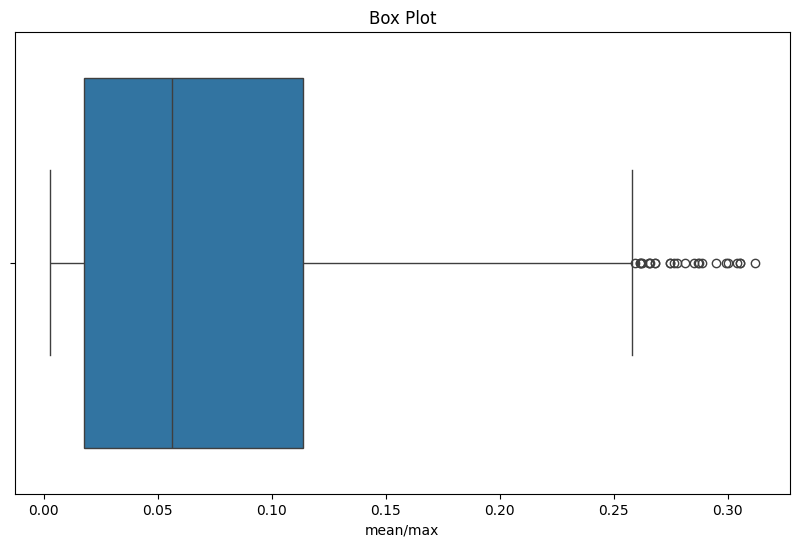

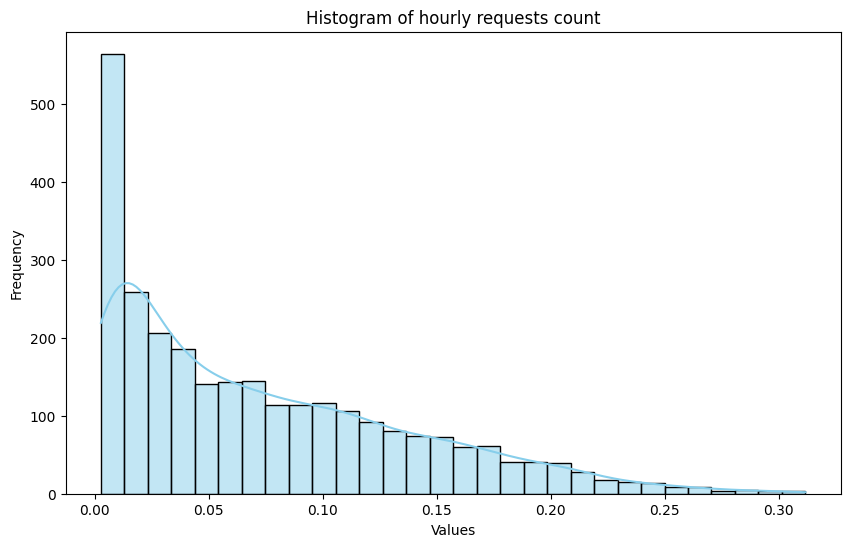

In [34]:
import seaborn as sns

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=edge_summary_dataframe['mean/max'])
plt.title('Box Plot')
plt.show()

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(edge_summary_dataframe['mean/max'], kde=True, bins=30, color='skyblue')
plt.title('Histogram of hourly requests count')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

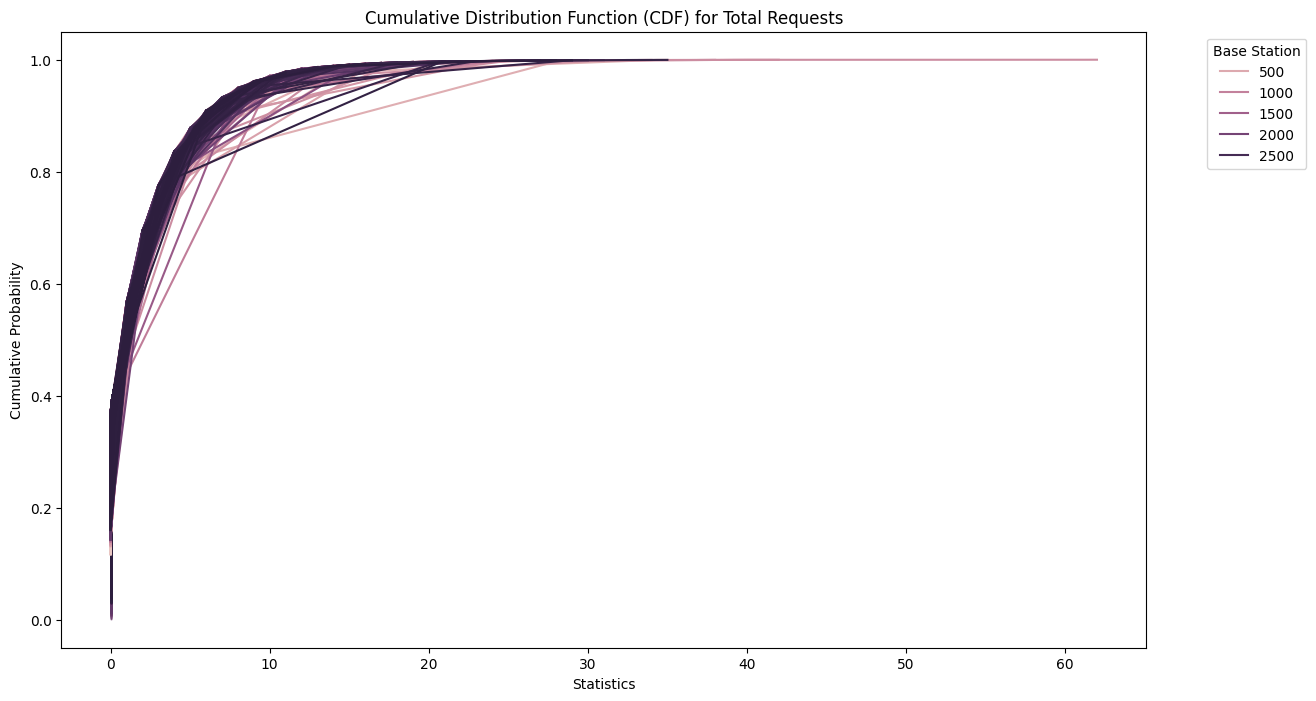

In [35]:
def plot_cdf(summary_dataframe):
    """
    Plot Cumulative Distribution Function (CDF) for total_requests summary statistics.

    Parameters:
    - summary_dataframe: pandas DataFrame with columns "base_station", "mean", "max", "ratio_mean_max", "75%", "85%", "95%", "99%", "99.9%".
    """
    plt.figure(figsize=(14, 8))

    # Melt the DataFrame to make it suitable for CDF plot
    melted_df = pd.melt(summary_dataframe, id_vars=['base_station'], value_vars=['mean', '25%', '50%', '75%', '85%', '95%', '99%', '99.9%', 'max'])

    # Sort the values for plotting CDF
    melted_df.sort_values(by='value', inplace=True)

    # Create CDF values
    cdf_values = np.arange(1, len(melted_df) + 1) / len(melted_df)

    # Plotting using a line plot
    sns.lineplot(x='value', y=cdf_values, hue='base_station', data=melted_df)

    plt.xlabel('Statistics')
    plt.ylabel('Cumulative Probability')
    plt.title('Cumulative Distribution Function (CDF) for Total Requests')
    plt.legend(title='Base Station', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Example usage:
# Assuming your summary DataFrame is named 'result_summary'
plot_cdf(edge_summary_dataframe)

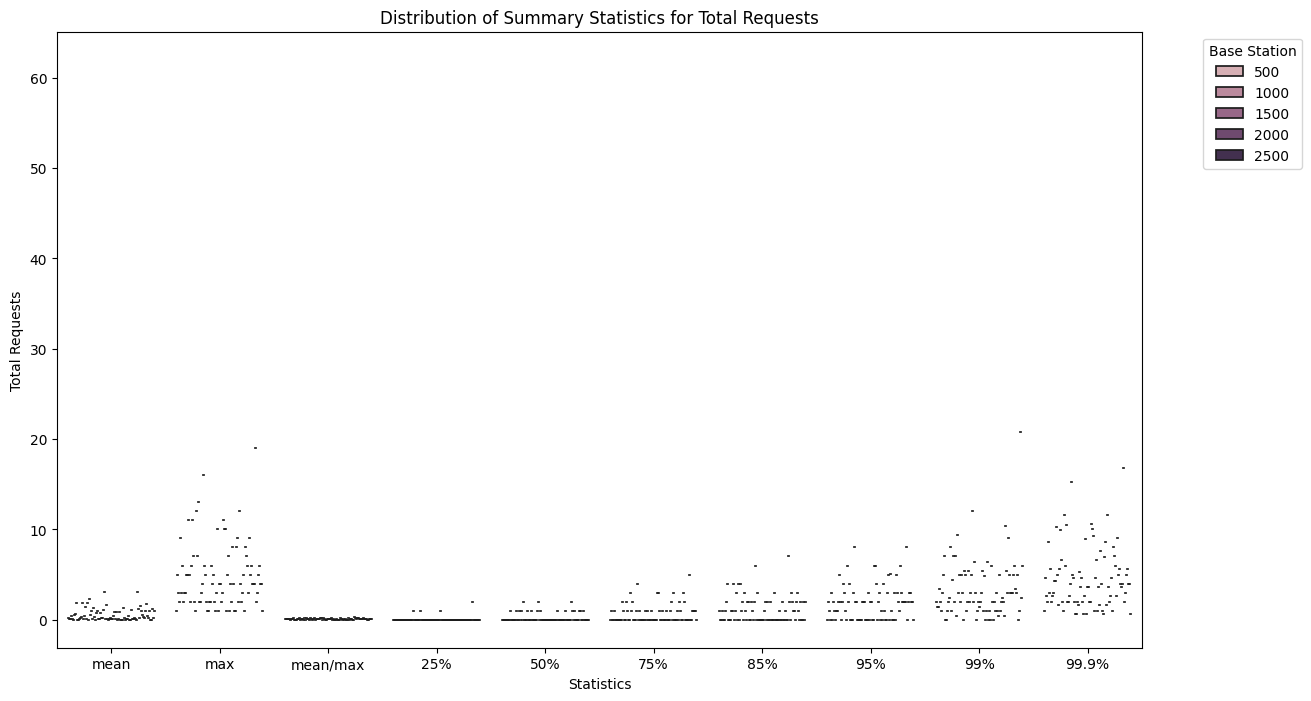

In [44]:
def plot_summary_distribution(summary_dataframe):
    """
    Plot distribution summary statistics for total_requests using a violin plot.

    Parameters:
    - summary_dataframe: pandas DataFrame with columns "base_station", "mean", "max", "ratio_mean_max", "75%", "85%", "95%", "99%", "99.9%".
    """
    plt.figure(figsize=(14, 8))

    # Melt the DataFrame to make it suitable for violin plot
    melted_df = pd.melt(summary_dataframe, id_vars=['base_station'], value_vars=['mean', 'max', 'mean/max', '25%', '50%', '75%', '85%', '95%', '99%', '99.9%'])

    # Plotting using a violin plot
    sns.violinplot(x='variable', y='value', hue='base_station', data=melted_df, split=True, inner='quart')

    plt.xlabel('Statistics')
    plt.ylabel('Total Requests')
    plt.title('Distribution of Summary Statistics for Total Requests')
    plt.legend(title='Base Station', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Example usage:
# Assuming your summary DataFrame is named 'result_summary'
plot_summary_distribution(edge_summary_dataframe)

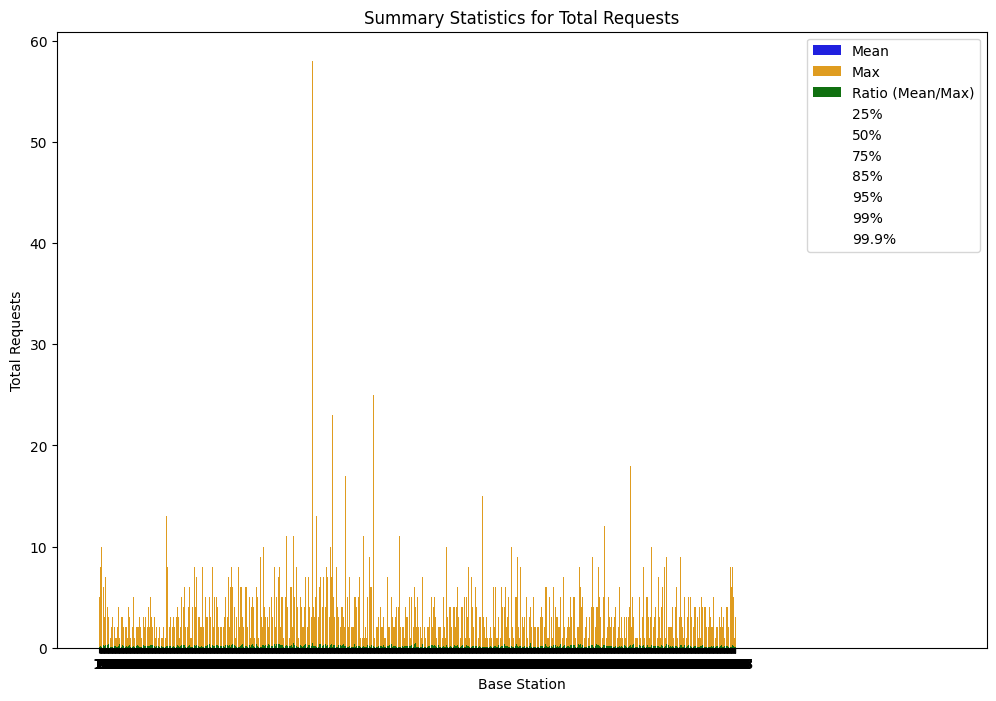

In [29]:
def plot_summary(summary_dataframe):
    """
    Plot summary statistics for total_requests.

    Parameters:
    - summary_dataframe: pandas DataFrame with columns "base_station", "mean", "max", "ratio_mean_max", "75%", "85%", "95%", "99%", "99.9%".
    """
    plt.figure(figsize=(12, 8))

    # Plotting mean, max, and ratio_mean_max
    sns.barplot(x='base_station', y='mean', data=summary_dataframe, color='blue', label='Mean')
    sns.barplot(x='base_station', y='max', data=summary_dataframe, color='orange', label='Max')
    sns.barplot(x='base_station', y='mean/max', data=summary_dataframe, color='green', label='Ratio (Mean/Max)')

    # Adding error bars for percentiles
    plt.errorbar(x=summary_dataframe['base_station'], y=summary_dataframe['25%'], yerr=None, fmt=' ', color='black', capsize=5, label='25%')
    plt.errorbar(x=summary_dataframe['base_station'], y=summary_dataframe['50%'], yerr=None, fmt=' ', color='black', capsize=5, label='50%')
    plt.errorbar(x=summary_dataframe['base_station'], y=summary_dataframe['75%'], yerr=None, fmt=' ', color='black', capsize=5, label='75%')
    plt.errorbar(x=summary_dataframe['base_station'], y=summary_dataframe['85%'], yerr=None, fmt=' ', color='red', capsize=5, label='85%')
    plt.errorbar(x=summary_dataframe['base_station'], y=summary_dataframe['95%'], yerr=None, fmt=' ', color='purple', capsize=5, label='95%')
    plt.errorbar(x=summary_dataframe['base_station'], y=summary_dataframe['99%'], yerr=None, fmt=' ', color='brown', capsize=5, label='99%')
    plt.errorbar(x=summary_dataframe['base_station'], y=summary_dataframe['99.9%'], yerr=None, fmt=' ', color='gray', capsize=5, label='99.9%')

    plt.xlabel('Base Station')
    plt.ylabel('Total Requests')
    plt.title('Summary Statistics for Total Requests')
    plt.legend()
    plt.show()

# Example usage:
# Assuming your summary DataFrame is named 'result_summary'
plot_summary(edge_summary_dataframe)

C:\Users\summitsh\AppData\Local\Temp\1\ipykernel_1956\4197674349.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hours'] = filtered_data.groupby('base_station').cumcount() + 1
C:\Users\summitsh\AppData\Local\Temp\1\ipykernel_1956\4197674349.py:25: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.lineplot(x='hours', y='total_requests', hue='base_station', data=filtered_data, palette=candy_colors, marker='.')


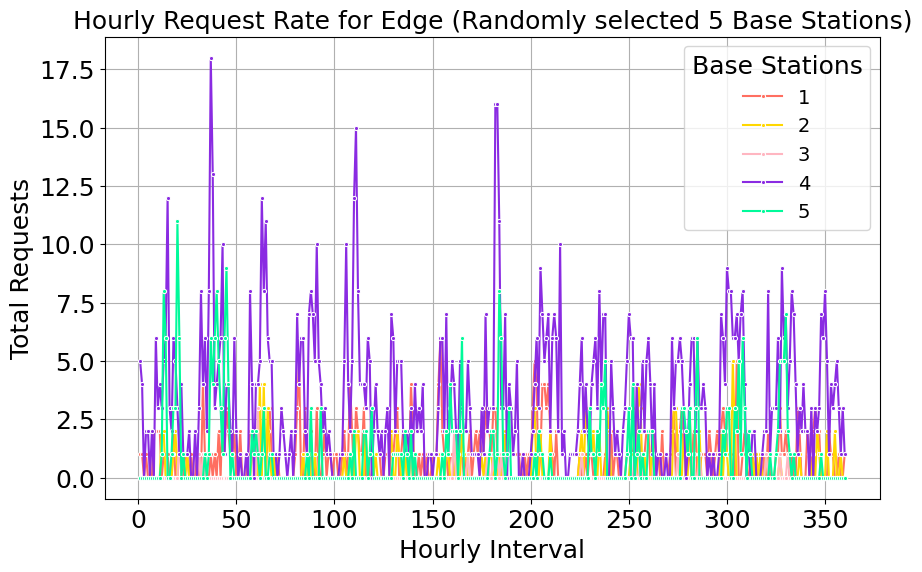

In [55]:
def plot_hourly_requests(dataframe, num_base_stations=5):
    """
    Plot the total number of requests hourly for the first five base stations.

    Parameters:
    - dataframe: pandas DataFrame with columns "base_station", "hourly_interval", and "total_requests".
    - num_base_stations: Number of base stations to include in the plot.

    Returns:
    None
    """
    # Filter the data for the first num_base_stations
    top_base_stations = dataframe['base_station'].unique()[:num_base_stations]
    filtered_data = dataframe[dataframe['base_station'].isin(top_base_stations)]
    filtered_data['hours'] = filtered_data.groupby('base_station').cumcount() + 1

    # Set a color palette with candy colors
    candy_colors = ['#FF6F61', '#FFD700', '#FFB6C1', '#8A2BE2', '#00FA9A', '#40E0D0', '#FF4500']
    # candy_colors = ['#4E79A7', '#F28E2B', '#59A14F', '#76B7B2', '#EDC948']
    # candy_colors = ['#FF0800', '#FFC0CB', '#FFF44F', '#3EB489', '#87CEEB']

    # Create a line plot
    plt.rcParams['font.size'] = 18
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='hours', y='total_requests', hue='base_station', data=filtered_data, palette=candy_colors, marker='.')

    plt.xlabel('Hourly Interval', fontsize=18)
    plt.ylabel('Total Requests', fontsize=18)
    plt.title(f'Hourly Request Rate for Edge (Randomly selected {num_base_stations} Base Stations)', fontsize=18)
    plt.legend(title='Base Stations', fontsize=14)
    plt.grid(True)
    plt.savefig("finalized_analysis_data/edge_requests.png")
    plt.show()

# Example usage:
# Assuming your DataFrame is named 'df'
plot_hourly_requests(hourly_requests_per_bs, num_base_stations=5)

C:\Users\summitsh\AppData\Local\Temp\1\ipykernel_6376\1827053278.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hours'] = df.groupby('base_station').cumcount() + 1


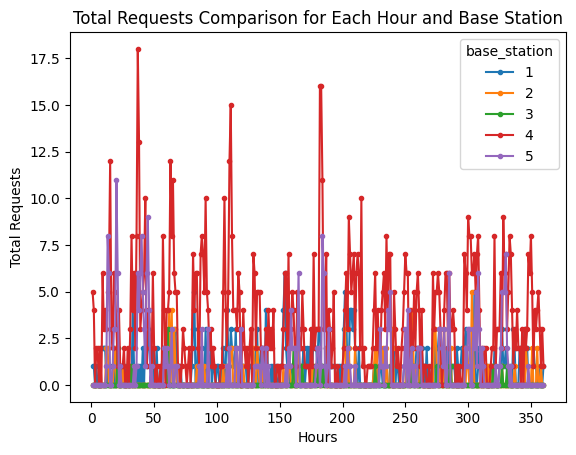

In [38]:
# Create a pandas DataFrame
filtered_data = hourly_requests_per_bs['base_station'].unique()[:5]
df = hourly_requests_per_bs[hourly_requests_per_bs['base_station'].isin(filtered_data)]
df['hours'] = df.groupby('base_station').cumcount() + 1

# Pivot the DataFrame to have base_station as columns, hours as index, and total_requests as values
pivot_df = df.pivot(index='hours', columns='base_station', values='total_requests')

# Plotting the line plot
pivot_df.plot(kind='line', marker='.')

# Adding labels and title
plt.xlabel('Hours')
plt.ylabel('Total Requests')
plt.title('Total Requests Comparison for Each Hour and Base Station')

# Display the plot
plt.show()

In [39]:
hourly_requests_per_bs.groupby('base_station')['total_requests'].mean().describe(percentiles=[.25, .50, .75, .85, .95, .99, .999])

count    2769.000000
mean        0.564843
std         0.742427
min         0.002778
25%         0.047222
50%         0.266667
75%         0.825000
85%         1.219444
95%         2.075000
99%         3.194889
99.9%       5.401067
max         7.613889
Name: total_requests, dtype: float64

In [40]:
hourly_requests_per_bs.groupby('base_station')['total_requests'].max().describe(percentiles=[.25, .50, .75, .85, .95, .99, .999])

count    2769.000000
mean        5.699169
std         4.705581
min         1.000000
25%         3.000000
50%         4.000000
75%         7.000000
85%         9.000000
95%        14.000000
99%        24.000000
99.9%      35.696000
max        62.000000
Name: total_requests, dtype: float64

In [41]:
mean_requests_per_bs = hourly_requests_per_bs.groupby('base_station')['total_requests'].mean()

mean_requests_per_bs

base_station
1       0.983333
2       0.405556
3       0.077778
4       3.447222
5       0.863889
          ...   
2765    0.016667
2766    0.141667
2767    0.150000
2768    0.916667
2769    0.002778
Name: total_requests, Length: 2769, dtype: float64

In [42]:
mean_requests_per_bs = hourly_requests_per_bs.groupby('base_station')['total_requests'].mean().mean()

max_requests_per_bs = hourly_requests_per_bs.groupby('base_station')['total_requests'].max().mean()

print(mean_requests_per_bs/ max_requests_per_bs)

0.09910968886635826


In [43]:
mean_requests_per_bs = hourly_requests_per_bs.groupby('base_station')['total_requests'].mean().max()

max_requests_per_bs = hourly_requests_per_bs.groupby('base_station')['total_requests'].max().max()

print(mean_requests_per_bs/ max_requests_per_bs)

0.12280465949820789
